In [6]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt 
import os
from pathlib import Path
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score  # for classification
from sklearn.metrics import mean_squared_error  # for regression

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix



In [7]:
df = pd.read_csv("out/Clean.csv", sep=";", decimal=",")
df.head()

,CaseNumber,LastName,PostCode,Age,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,...,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,HasCholesterol,RestingECG_Normal,RestingECG_ST,RestingECG_LVH,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,431-06-4243,Richard,99847,40,140,289,0,172,0,0.0,...,1,0,0,1,1,0,0,0,0,1
1,415-39-7809,Sheppard,64192,49,160,180,0,156,0,1.0,...,0,1,0,1,1,0,0,0,1,0
2,517-18-4618,Howard,29132,37,130,283,0,98,0,0.0,...,1,0,0,1,0,1,0,0,0,1
3,634-33-8726,Taylor,12930,48,138,214,0,108,1,1.5,...,0,0,0,1,1,0,0,0,1,0
4,151-40-1619,Mcgrath,79393,54,150,195,0,122,0,0.0,...,0,1,0,1,1,0,0,0,0,1


In [8]:

# Drop non-numeric columns
columns_to_drop = ['CaseNumber', 'LastName', 'PostCode']
df = df.drop(columns=columns_to_drop)

# Separate features from the target variable
X = df.drop(columns='HeartDisease')
y = df['HeartDisease']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  # Only transform, do not fit the scaler on test data!

# Train the KNN classifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the classifier's performance
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[52 18]
 [19 94]]
              precision    recall  f1-score   support

           0       0.73      0.74      0.74        70
           1       0.84      0.83      0.84       113

    accuracy                           0.80       183
   macro avg       0.79      0.79      0.79       183
weighted avg       0.80      0.80      0.80       183


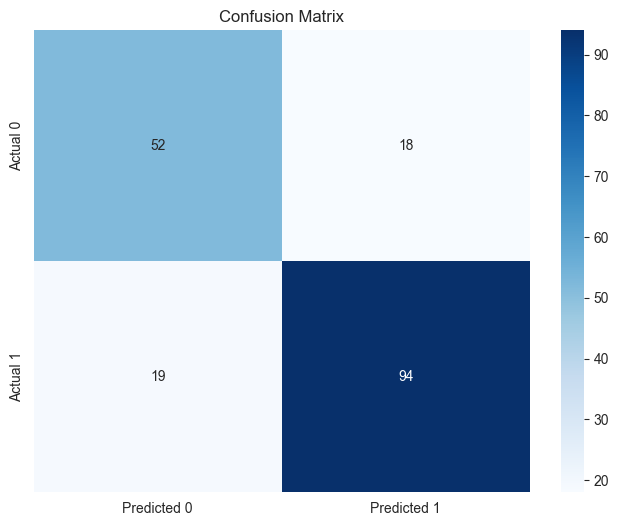

In [9]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.show()

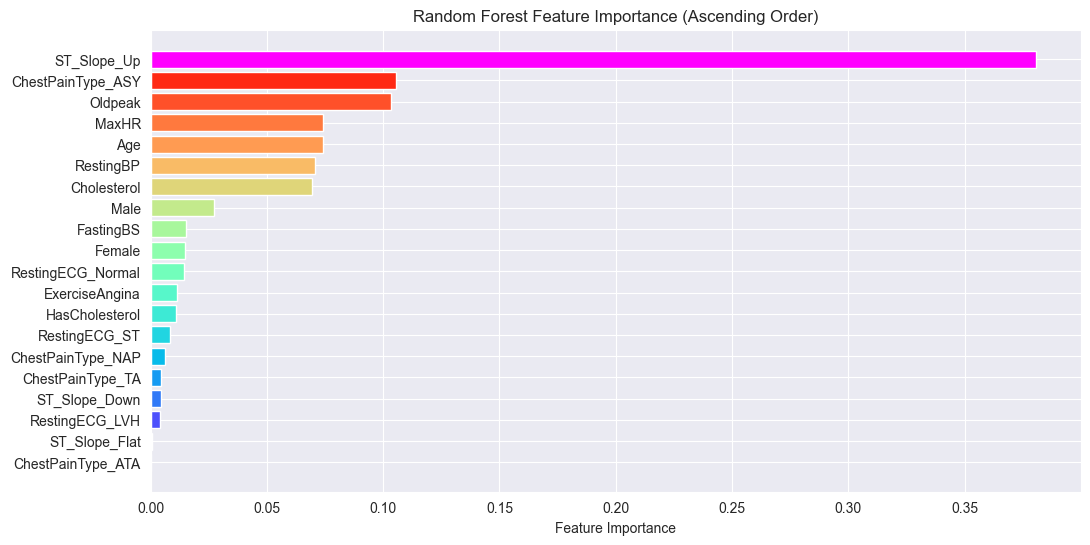

In [10]:

# Get feature importances from the trained classifier
feature_importances = classifier.feature_importances_

# Get the list of feature names
feature_names = X.columns

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the features by importance in ascending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Create a rainbow color palette
n_features = len(feature_importance_df)
colors = plt.cm.rainbow(np.linspace(0, 1, n_features))

# Set the top bar color to pink
colors[-1] = (1.0, 0.0, 1.0, 1.0)  # Pink color in RGBA format

# Create a bar plot to visualize feature importances with custom colors
plt.figure(figsize=(12, 6))
plt.barh(range(len(feature_importance_df)), feature_importance_df['Importance'], align='center', color=colors)
plt.yticks(range(len(feature_importance_df)), feature_importance_df['Feature'])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance (Ascending Order)')
plt.show()